## 서울시 청소년 정신건강 분석

In [3]:
import numpy as np
import pandas as pd

### 서울시 청소년들의 스트레스 데이터 읽어오기

In [4]:
# 엑셀파일 읽어오기 : xLrd모듈 설치되어있어야 함.
pd.read_excel("../data/teenage_mental.xls")

,기간,구분,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,기간,구분,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [5]:
pd.read_excel("../data/teenage_mental.xls", header=1)

,기간,구분,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [6]:
# 원하는 범위만큼만 불러오기(엑셀의 c~k컬럼 추출)
pd.read_excel("../data/teenage_mental.xls", header=1, usecols="C:K")

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [7]:
col_names = ['스트레스', '스트레스남학생','스트레스여학생', '우울감경험률', 
             '우울남학생', '우울여학생', '자살생각율', '자살남학생', '자살여학생']
pd.read_excel("../data/teenage_mental.xls", header=1, usecols="C:K", names=col_names)

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [8]:
raw_data = pd.read_excel("../data/teenage_mental.xls", 
                         header=1, usecols="C:K", names=col_names)
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [9]:
# 기존 행 값을 이용하여 그렇다/아니다 행을 추가하기
raw_data.loc[1] = 100 - raw_data.loc[0]
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


In [10]:
raw_data['응답'] = ['그렇다', '아니다']
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


In [11]:
# set_index() : 어떤 컬럼을 인덱스로 쓸 것인가
# drop = True : 인덱스를 설정 후 기존에 있던 컬럼을 삭제할 것인가?
# inplace = True : DataFrame의 내용을 갱신할 것인지 여부

raw_data.set_index('응답', drop=True, inplace=True)
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family = font_name)

In [19]:
raw_data['스트레스']

응답
그렇다    42.7
아니다    57.3
Name: 스트레스, dtype: float64

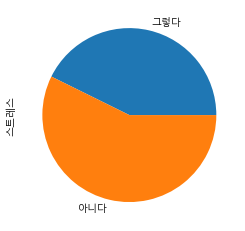

In [20]:
raw_data['스트레스'].plot.pie()

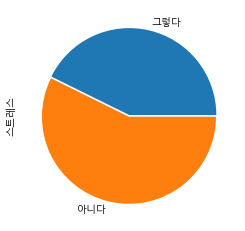

In [21]:
raw_data['스트레스'].plot.pie(explode=[0, 0.02])

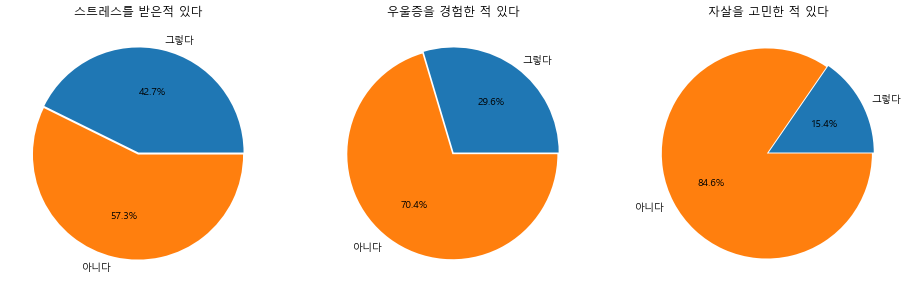

In [24]:
f, ax = plt.subplots(1,3, figsize=(16, 8))

raw_data['스트레스'].plot.pie(explode=[0, 0.02],
                         ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('스트레스를 받은적 있다')
ax[0].set_ylabel('')

raw_data['우울감경험률'].plot.pie(explode=[0, 0.02],
                         ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('우울증을 경험한 적 있다')
ax[1].set_ylabel('')

raw_data['자살생각율'].plot.pie(explode=[0, 0.02],
                         ax=ax[2], autopct='%1.1f%%')
ax[2].set_title('자살을 고민한 적 있다')
ax[2].set_ylabel('')

plt.show()